## Analysis packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import file (excel)
df = pd.read_excel('C:/Users/herna/Documents/HERNÁN/Data Analysis/PGP Data Analytics/3_Courses (7)/7_Data Analyst Capstone/Project 1 - Healthcare/data.xlsx')

## EDA

In [3]:
#head
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#rows, columns
df.shape

(303, 14)

In [5]:
#unique values
df.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
#nulls
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#looking for duplicates
df.duplicated().sum()

1

In [8]:
#delete duplicates
df = df.drop_duplicates()

In [9]:
#rows, columns
df.shape

(302, 14)

In [10]:
#summary of count, min, max, mean, st dev
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
#proportion of + and - binary predictor
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

## Correlation Matrix

<AxesSubplot:>

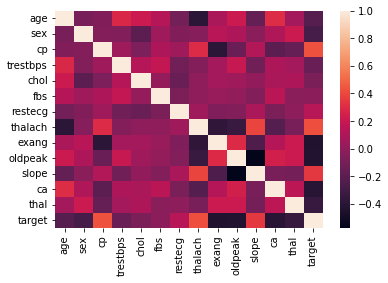

In [12]:
#Basic heatmap
corr = df.corr()
sns.heatmap(corr)

<AxesSubplot:>

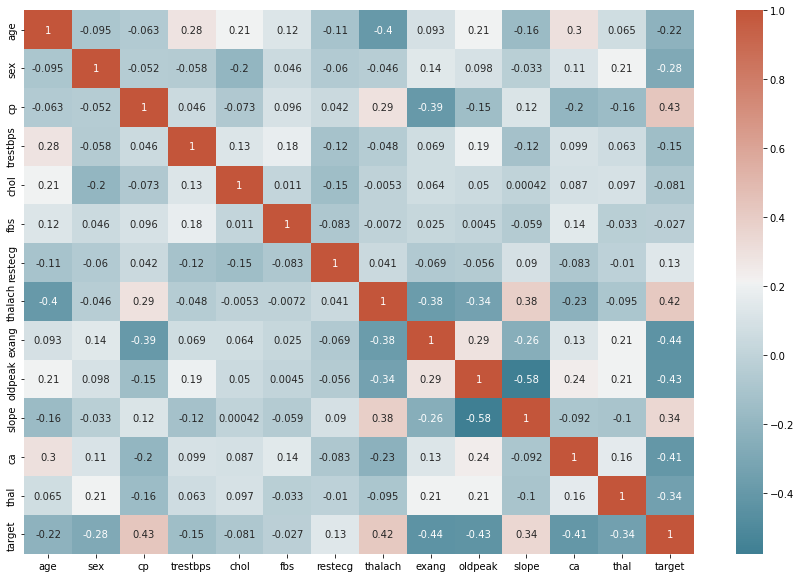

In [13]:
#Detailed heatmap
corr = df.corr()
plt.subplots(figsize = (15, 10))
sns.heatmap(corr,
            xticklabels = corr.columns,
            yticklabels = corr.columns,
            annot = True,
            cmap = sns.diverging_palette(220,20,as_cmap=True))

##### Respect to target
###### * positive correlation --> cp (+0.43), thalach (+0.42)
###### * negative correlation --> exang (-0.44), oldpeak (-0.43)

## Pairplots with continuous features

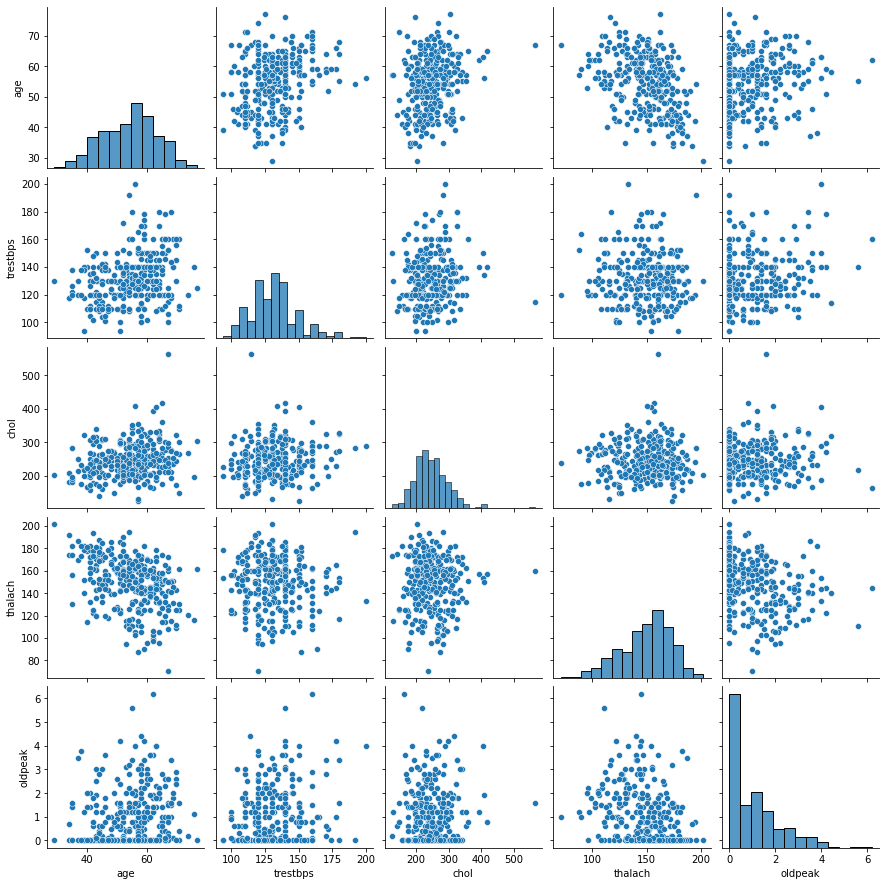

In [14]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

## ST depression (oldpeak) vs Heat disease (target)

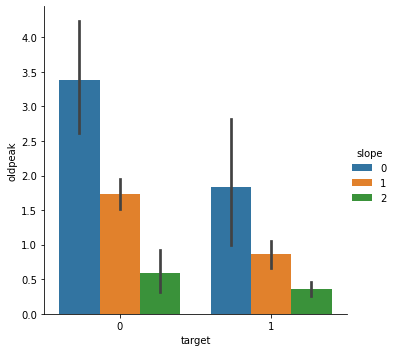

In [15]:
sns.catplot(x = 'target',
           y = 'oldpeak',
           hue = 'slope',
           kind = 'bar',
           data = df)

##### Same distribution for both heart conditions, low oldpeak means higher rish

## Box plot to check thalach vs target

<AxesSubplot:xlabel='target', ylabel='thalach'>

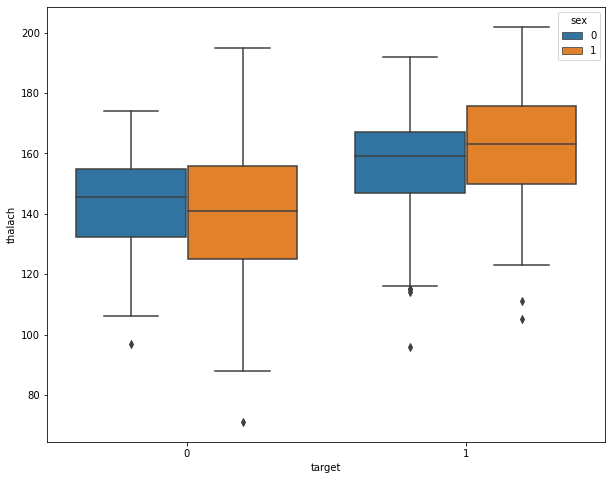

In [16]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'target',
           y = 'thalach',
           hue = 'sex',
           data = df)

##### Similar distribution for male and females
##### Positive heart disease patients have higher median for thalach

## Filter positive (1) and negative (0) Heart Disease patients, to compare both oldpeak and thalach mean

In [17]:
positive_df = df[df['target'] == 1]
positive_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
negative_df = df[df['target'] == 0]
negative_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [19]:
positive_df['oldpeak'].mean()

0.5865853658536584

In [20]:
negative_df['oldpeak'].mean()

1.5855072463768118

In [21]:
positive_df['thalach'].mean()

158.3780487804878

In [22]:
negative_df['thalach'].mean()

139.1014492753623

##### Positive patients have 1/3 of the oldpeak respect the negative patients

## Model Building

### Logistic Regression

In [23]:
# assign the 13 features to X and target to y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [24]:
# split data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [25]:
# normalize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state = 1)    #get instance of model
model1.fit(X_train, y_train)                     #train/fit model

y_pred1 = model1.predict(X_test)                 #get y predictions
print(classification_report(y_test, y_pred1))    #accuracy

              precision    recall  f1-score   support

           0       0.84      0.72      0.78        29
           1       0.78      0.88      0.82        32

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



##### Logistic Regression Accuracy = 80%

### K-NN (K- Nearest Neighbors)

In [27]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()                 #get instance of model
model2.fit(X_train, y_train)                    #train/fit model

y_pred2 = model2.predict(X_test)                #get y pred
print(classification_report(y_test, y_pred2))   #accuracy

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82      0.88      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



##### K-NN Accuracy = 84%

### SVM (Support Vector Machine) 

In [28]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

model3 = SVC(random_state = 1)                  #get instance of model
model3.fit(X_train, y_train)                    #train/fit model

y_pred3 = model3.predict(X_test)                #get y pred
print(classification_report(y_test, y_pred3))   #accuracy

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.76      0.88      0.81        32

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



##### SVM Accuracy = 79%

### Naives Bayes Classifier

In [29]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB()                           #get instance of model
model4.fit(X_train, y_train)                    #train/fit model

y_pred4 = model4.predict(X_test)                #get y pred
print(classification_report(y_test, y_pred4))   #accuracy

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



##### Naives Bayes Classifier Accuracy = 82%

### Decision Trees

In [30]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state = 1)         #get instance of model
model5.fit(X_train, y_train)                              #train/fit model

y_pred5 = model5.predict(X_test)                          #get y pred
print(classification_report(y_test, y_pred5))             #accuracy

              precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.77      0.75      0.76        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



##### Decision Trees Accuracy = 75%

### Random Forest

In [31]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state = 1)         #get instance of model
model6.fit(X_train, y_train)                              #train/fit model

y_pred6 = model6.predict(X_test)                          #get y pred
print(classification_report(y_test, y_pred6))             #accuracy

              precision    recall  f1-score   support

           0       0.84      0.72      0.78        29
           1       0.78      0.88      0.82        32

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



##### Random Forest Accuracy = 80%

#### Highest Accuracy for K-NN (84%)

## Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred2)      #y_pred2 for K-NN
print(cm)
accuracy_score(y_test, y_pred2)

[[23  6]
 [ 4 28]]


0.8360655737704918

###### TP = 23, FP = 6
###### FN = 4, TN = 28
###### Accuracy = 83.61%

## Predictions

### Scenario
##### age = 20
##### sex = 1
##### cp =  2
##### trestbps =  110
##### chol = 230
##### fbs > 120 --> 1
##### restecg =  
##### thalach =  
##### exang =  1
##### oldpeak = 2.2  
##### slope =  2
##### ca = 0
##### thal = 2

In [33]:
print(model2.predict(sc.transform([[20, 1, 2, 110, 230, 1, 1, 140, 1, 2.2, 2, 0, 2]])))

[1]


#### Binary output = 1, therefore Diagnosis of Heart Disease

## Conclusions

### - Cp, oldpeak and thalach are the most significant features that help to classify between a positive or negative diagnosis
### - The model is ready to classify patients 
### - The K-NN model has over 80% accuracy, which is above 70%, so it is ideal 